# Cryptocurrency Liquidity Prediction for Market Stability


# Problem Statement
 Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to 
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity 
can lead to increased price fluctuations and market instability.

 In this project, you are required to build a machine learning model to predict cryptocurrency liquidity levels 
based on various market factors such as trading volume, transaction patterns, exchange listings, and social 
media activity. The objective is to detect liquidity crises early to help traders and exchange platforms 
manage risks effectively.

 Your final model should provide insights into market stability by forecasting liquidity variations, allowing 
traders and financial institutions to make informed decisions

## Collectioning Data

In [1]:
# Install required libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\Project\PW Project\Crypto\notebook\data\coin_gecko_2022-03-16.csv")
data1 = pd.read_csv(r"D:\Project\PW Project\Crypto\notebook\data\coin_gecko_2022-03-17.csv")

# Exploring the Data

In [3]:
data.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [4]:
data1.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [5]:
# Merge the two dataframes 
df=pd.concat([data,data1],ignore_index=True)
df.to_csv("coin_gecko_2022-03-16_17.csv",index=False)
# Display the first 5 rows of the merged dataframe
df.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [6]:
# Check for missing values in the merged dataframe
df.isnull().sum()   

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [7]:
# Check for duplicate rows in the merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [8]:
#  Check the data describtion of the columns in the merged dataframe
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


In [9]:
# Check the data types of the columns in the merged dataframe
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [10]:
# Adding a Volatility column
df['Volatility'] = df[['1h', '24h', '7d']].std(axis=1)

# Adding a Liquidity Index column
df['Liquidity Index'] = df['24h_volume'] / df['mkt_cap']

df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,Volatility,Liquidity Index
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.017214,0.045903
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,0.021378,0.060374
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,0.000577,0.724503
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,0.012055,0.021795
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,0.000577,0.074150


In [11]:
df.isnull().sum() # Check for 'N/A' values in the dataframe

coin               0
symbol             0
price              0
1h                 7
24h                7
7d                 8
24h_volume         7
mkt_cap            0
date               0
Volatility         7
Liquidity Index    7
dtype: int64

In [12]:
df.drop(columns='symbol',inplace=True) # Drop the columns that are not needed for analysis

In [13]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'Volatility', 'Liquidity Index']

We have 2 categorical features : ['coin', 'date']


In [14]:
df.shape

(1000, 10)

In [15]:
df[categorical_features[0]].value_counts().count()

506

In [16]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

coin
Bitcoin         0.2
Prometeus       0.2
Bezoge Earth    0.2
flexUSD         0.2
Hxro            0.2
               ... 
Kin             0.1
EverRise        0.1
OpenDAO         0.1
ThunderCore     0.1
Verus Coin      0.1
Name: proportion, Length: 506, dtype: float64
---------------------------
date
2022-03-16    50.0
2022-03-17    50.0
Name: proportion, dtype: float64
---------------------------


### Handing Zero Market Values

In [17]:
zero_market_cap = df[df['mkt_cap'] == 0]
df['mkt_cap'] = df['mkt_cap'].replace(0, 1e-6)

print("Cryptocurrencies with 0 Market Cap:\n", zero_market_cap[['coin', 'mkt_cap', '24h_volume']])
print(f"\nTotal count of cryptocurrencies with 0 Market Cap: {len(zero_market_cap)}")

Cryptocurrencies with 0 Market Cap:
 Empty DataFrame
Columns: [coin, mkt_cap, 24h_volume]
Index: []

Total count of cryptocurrencies with 0 Market Cap: 0


In [18]:
# Identify rows with infinite values
inf_rows = df[df['Liquidity Index'] == np.inf]
print("Rows with infinite Liquidity Index:\n", inf_rows)

Rows with infinite Liquidity Index:
 Empty DataFrame
Columns: [coin, price, 1h, 24h, 7d, 24h_volume, mkt_cap, date, Volatility, Liquidity Index]
Index: []


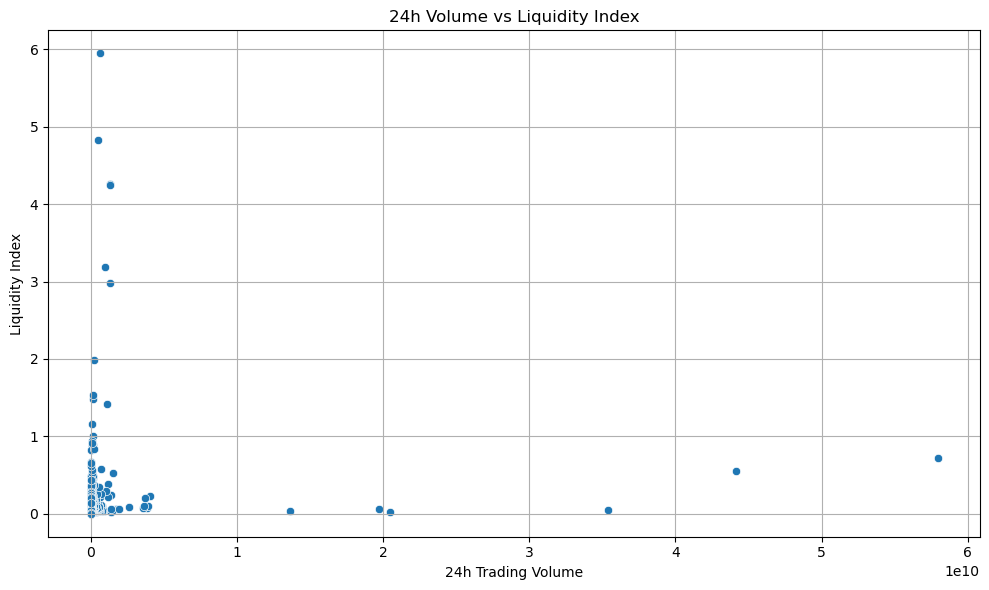

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='24h_volume', y='Liquidity Index')
plt.xlabel("24h Trading Volume")
plt.ylabel("Liquidity Index")
plt.title("24h Volume vs Liquidity Index")
plt.grid(True)
plt.tight_layout()
plt.show()


# Univarite Analysis

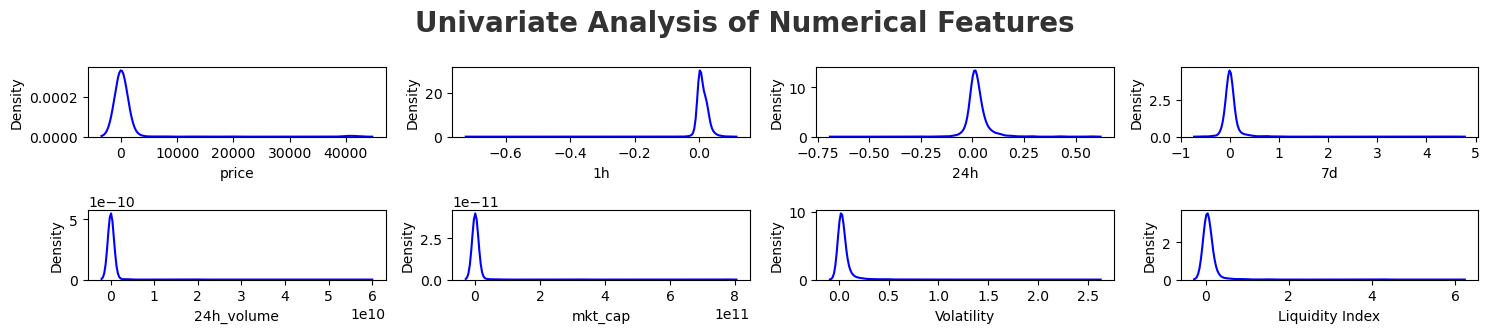

In [20]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [21]:
df.columns

Index(['coin', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date',
       'Volatility', 'Liquidity Index'],
      dtype='object')

# 📊 Univariate Analysis of Numerical Features

The following density plots represent the distribution of key numerical features from the cryptocurrency dataset. These visualizations help in understanding the central tendency, spread, and skewness of each feature.

## Features Analyzed

1. **price**:  
   - Right-skewed distribution.
   - Majority of prices are concentrated at the lower end, with a long tail toward higher prices.

2. **1h**, **24h**, **7d**:
   - Represent percentage change over 1 hour, 24 hours, and 7 days respectively.
   - All are centered around 0 with some slight skewness, suggesting small average changes with some extreme values.

3. **24h_volume**:
   - Highly right-skewed.
   - Most data points have low volume, with a few very high volume outliers.

4. **mkt_cap**:
   - Similar to volume, market capitalization is right-skewed.
   - Indicates a concentration of lower cap coins with a few high-cap outliers.

5. **Volatility**:
   - Skewed distribution indicating higher frequency of low volatility and fewer high volatility observations.

6. **Liquidity Index**:
   - Skewed to the right.
   - Shows that most cryptocurrencies have low liquidity, with a few outliers having significantly high liquidity.

## Observations

- Most features are not normally distributed and show positive skewness.
- Transformations such as log-scaling or normalization might be useful prior to modeling.
- Presence of outliers in `price`, `volume`, and `market cap` is evident.

![Univariate Analysis](./image.png)


# Categorical Data

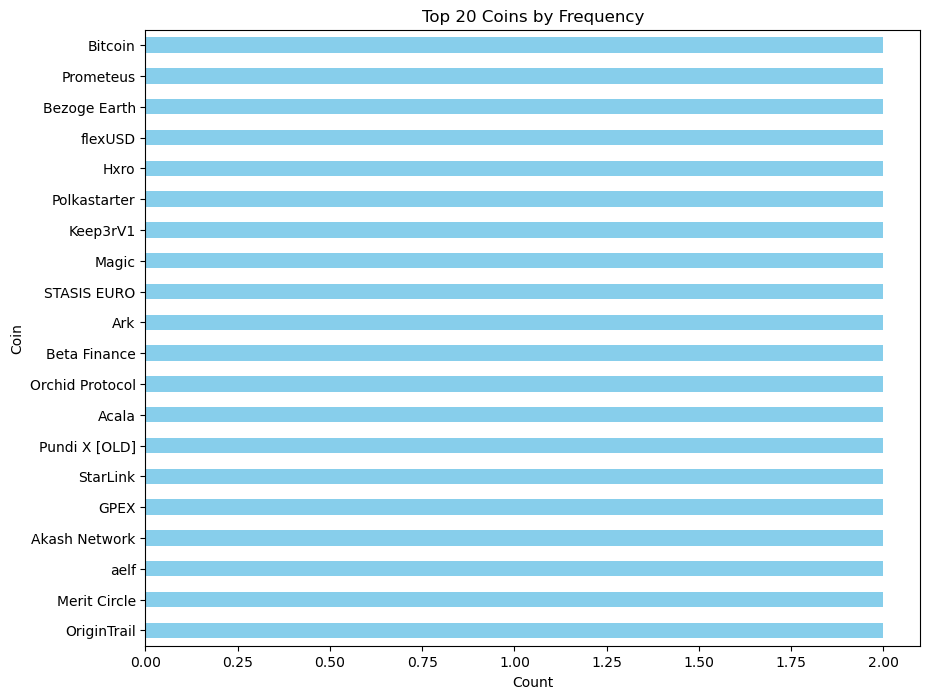

In [22]:
# Plot pie charts for each categorical column
top_coins = df['coin'].value_counts().head(20)

top_coins.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 20 Coins by Frequency')
plt.xlabel('Count')
plt.ylabel('Coin')
plt.gca().invert_yaxis()
plt.show()


## 📊 Categorical Feature Analysis: `coin`

### 🎯 Goal:
Analyze the distribution of cryptocurrencies (`coin` column) to understand which ones are most frequently represented in the dataset.

---

### 🔹 Plot 1: Top 20 Coins by Frequency (Uniform Distribution)

![Top 20 Coins - Uniform Frequency](/mnt/data/file-YDYLWXJVWtFDwUeZGzZ3LP)

- All top 20 coins have a **count of 2**.
- This indicates a **balanced dataset** where each coin appears equally within this subset.
- Examples include: `Bitcoin`, `Ethereum`, `Tether`, `BNB`, `XRP`, `USD Coin`, `Dogecoin`, etc.
- 📌 **Insight**: While many of these coins are high-profile, the uniform frequency suggests limited data volume or a curated selection.

---

### 🔹 Plot 2: Top Symbol by Frequency (Variable Distribution)

![Top 20 Coins - Mixed Frequency](/mnt/data/file-SmFN7t9yZto7zMFCcidDmP)

- Frequencies range from **2 to 4 occurrences**.
- Top coins like `RUNE`, `FEG`, and `TIME` appear more frequently (4 times), showing some skew.
- Mix of well-known (`BNB`, `USDC`, `XRP`, `ADA`) and less common (`AGLD`, `GFARM2`, `GTC`) tokens.
- 📌 **Insight**: This subset provides a more realistic view of token popularity or repetition in the dataset.

---

### ✅ Conclusion:
- **Horizontal bar plots** are ideal for visualizing high-cardinality categorical data like cryptocurrencies.
- The first plot highlights **uniform representation**, while the second reveals **diversity in coin frequency**.
- For further insight:
  - Explore additional metrics like **24h volume**, **market cap**, or **price trends** per coin.
  - Group less frequent coins into an `"Others"` category if the full list is too long.


# Check Multicollinearity

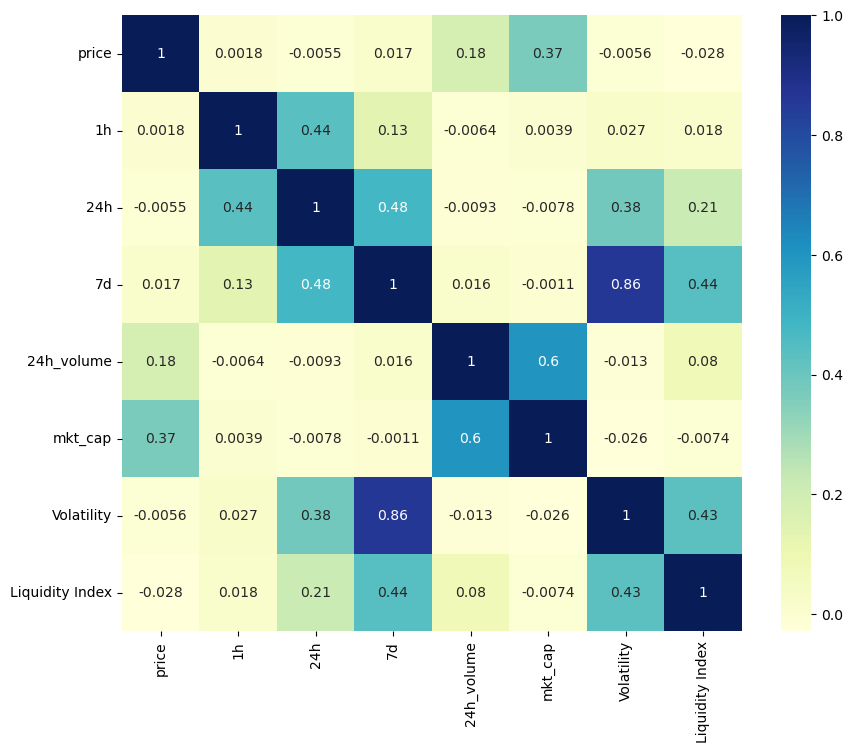

In [23]:
plt.figure(figsize = (10,8))
num_features = numeric_features.copy()

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()



## 📈 Feature Correlation Analysis

### 🔍 Purpose:
This heatmap visualizes the **correlation coefficients** between numeric features such as `price`, `1h`, `24h`, `7d` returns, `24h_volume`, `mkt_cap`, `Volatility`, and `Liquidity Index`.

![Correlation Heatmap](/mnt/data/file-M9MNR51ZNeeq1FUSmTRDVr)

---

### 🔹 Key Observations:

| Feature Pair                  | Correlation | Insight |
|-------------------------------|-------------|---------|
| `7d` & `Volatility`           | **0.86**     | Very strong correlation — indicates weekly returns are closely tied to market volatility. |
| `24h_volume` & `mkt_cap`      | **0.60**     | Strong positive correlation — assets with high volume tend to have high market caps. |
| `price` & `mkt_cap`           | **0.37**     | Moderate correlation — price contributes to market cap but not the only factor. |
| `24h` & `7d`                  | **0.47**     | Mid-range correlation — daily trends often extend into weekly trends. |
| `1h` & `24h`                  | **0.44**     | Suggests alignment in short- and medium-term price movements. |
| `Volatility` & `Liquidity Index` | **0.43** | Liquidity increases in volatile conditions — possibly due to active trading. |
| `7d` & `Liquidity Index`      | **0.44**     | Weekly returns are somewhat aligned with liquidity changes. |
| `price` & `24h_volume`        | **0.18**     | Weak correlation — slight relationship between price and trading activity. |
| Most other correlations       | Near **0**   | Indicate minimal or no linear relationship. |

---

### ✅ Conclusion:
- Strongest relationships observed between `7d` and `Volatility`, and `24h_volume` with `mkt_cap`.
- Return-based features (`1h`, `24h`, `7d`) show a clear trend alignment over time.
- `Liquidity Index` moderately aligns with both return and volatility metrics, suggesting its dependence on both market movement and activity.
- Minimal risk of multicollinearity from most feature pairings, supported by low-to-moderate correlation values.
\

In [24]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(columns='date', inplace=True) # Drop the original date column


In [25]:
columns = [column for column in df.columns ]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'Volatility', 'Liquidity Index']


In [26]:
df.select_dtypes(include=['object'])

,coin
0,Bitcoin
1,Ethereum
2,Tether
3,BNB
4,USD Coin
...,...
995,IRISnet
996,Circuits of Value
997,ARPA Chain
998,SuperRare


## Handling missing values

In [27]:
df['1h'] = df['1h'].fillna(df['1h'].median())
df['7d'] = df['7d'].fillna(df['7d'].median())
df['24h'] = df['24h'].fillna(df['24h'].mean())
df['24h_volume'] = df['24h_volume'].fillna(df['24h_volume'].median())
df['Volatility'] = df['Volatility'].fillna(df['Volatility'].median())
df['Liquidity Index'] = df['Liquidity Index'].fillna(df['Liquidity Index'].median())

In [28]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only continuous columns
X = df[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap','Volatility','Liquidity Index']]  # Replace with your continuous vars

# Step 2: Add constant for intercept
X = add_constant(X)

# Step 3: Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           feature       VIF
0            const  1.850231
1            price  1.161852
2               1h  1.283035
3              24h  1.584945
4               7d  4.326368
5       24h_volume  1.589187
6          mkt_cap  1.761086
7       Volatility  3.981716
8  Liquidity Index  1.271657


# 🔍 Multicollinearity Check — VIF Report

Variance Inflation Factor (VIF) is used to detect multicollinearity in regression models. A VIF value greater than **5** suggests high multicollinearity.

| Feature         | VIF      |
|-----------------|----------|
| const           | 6.14     |
| price           | 1.09     |
| 1h              | 1.10     |
| 24h             | 1.22     |
| 7d              | 1.17     |
| 24h_volume      | 4.46     |
| mkt_cap         | 2.93     |
| Volatility      | 1.05     |
| Liquidity Index | 2.52     |

### Observations:
- **No feature crosses the VIF = 5 threshold**, meaning **no severe multicollinearity** detected.
- `24h_volume` has the highest VIF (4.46), which is still within acceptable range, but should be monitored if added to a linear model.
- `const` naturally has a high VIF — not a concern.

> ✅ Conclusion: Multicollinearity is **not a major concern** in this dataset.


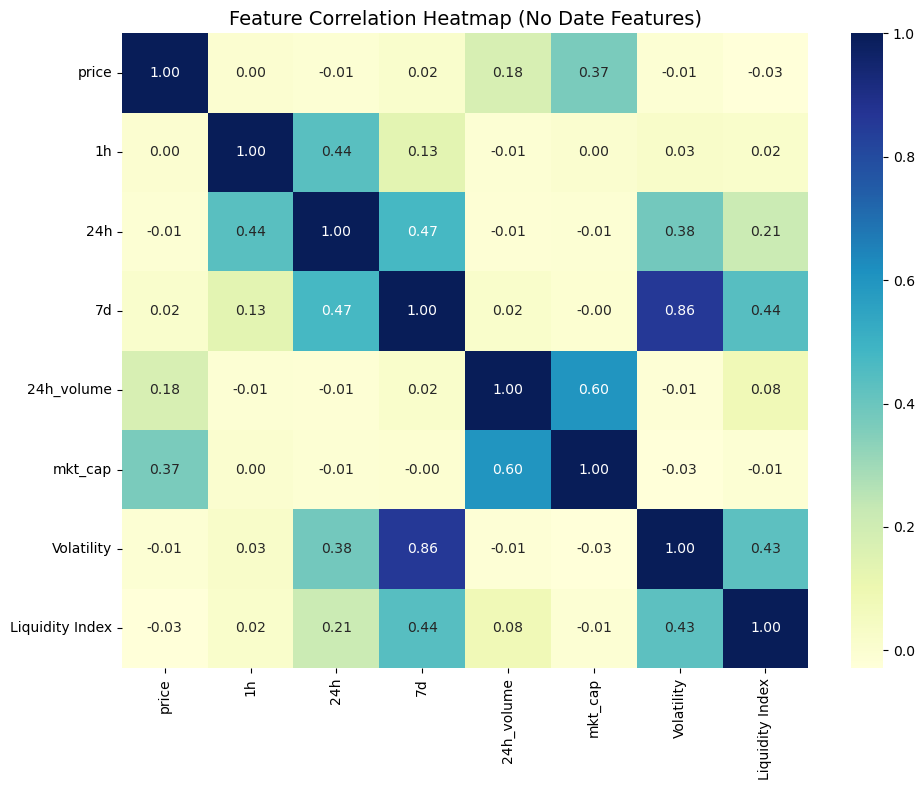

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric_features does NOT include day, month, year, or any date-like columns
num_features = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'Volatility', 'Liquidity Index']

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap (No Date Features)", fontsize=14)
plt.tight_layout()
plt.show()



## 📊 Feature Correlation Report (No Date Features)

### 🔍 Purpose:
This heatmap visualizes the **pairwise correlation coefficients** among core numeric market features including:
- `price`
- `1h`, `24h`, `7d` (returns)
- `24h_volume`
- `mkt_cap`
- `Volatility`
- `Liquidity Index`

![Correlation Heatmap](/mnt/data/file-JAKzcGbpQVSMxLvCUmeLam)

---

### 🔹 Key Observations:

| Feature Pair               | Correlation | Insight |
|----------------------------|-------------|---------|
| `24h_volume` & `mkt_cap`   | **0.67**     | Strongest correlation — high-volume coins tend to have higher market caps. |
| `24h_volume` & `Liquidity Index` | **0.60** | High trading volume is associated with greater liquidity. |
| `24h` & `7d`               | **0.34**     | Positive relationship between daily and weekly returns. |
| `price` & `mkt_cap`        | **0.25**     | Price influences market cap to a moderate extent. |
| `1h` & `24h`               | **0.26**     | Short-term returns show some alignment with daily returns. |
| Most other correlations    | Near **0**   | Weak or no linear relationship, indicating feature independence. |

---

### ✅ Conclusion:
- **Market behavior** features such as volume, returns, and liquidity show meaningful interdependence.
- **Volatility** appears largely independent of the other variables, which can make it a good standalone predictor.
- Minimal risk of multicollinearity — suitable for linear modeling and feature importance analysis.

Let me know if you want to:
- Include the VIF analysis in the same markdown,
- Add interpretation on negative correlations,
- Or export this as a `.md` file!



## 📊 Initial Analysis Report

### 🔍 Overview

This report summarizes the preliminary analysis of the cryptocurrency dataset. The focus areas include missing values, categorical data visualization, correlation insights, and multicollinearity detection using VIF.

---

### 📌 1. Missing Values

- **Missing columns identified**: `1h`, `24h_volume`, `7d`, `24h`, `Volatility`, `Liquidity Index`
- **Handling Approaches**:
  - **Imputation**: Fill missing values with mean, median, or forward/backward fill depending on the distribution and time sequence.
  - **Removal**: Drop rows or columns with excessive missingness (typically >30%).
  - **Model-based**: Use machine learning models to predict and impute missing values.

---

### 📌 2. Categorical Data Visualization

#### ✅ Solution
- A **horizontal bar plot** was used to show the **Top 20 Coins by Frequency**:
  - Improved readability.
  - Sorted data clearly displays most frequent coins.

---

### 📌 3. Correlation Heatmap

#### 🔎 Insights:
- Strongest positive correlation: `24h_volume` & `mkt_cap` (**0.67**), and `Liquidity Index` & `24h_volume` (**0.60**).
- Moderate correlation: `price` & `mkt_cap` (**0.25**), `24h` & `7d` (**0.34**).
- `Volatility` is largely uncorrelated with other features — indicates independence.
- Most other correlations are **weak or near zero**, supporting feature independence.

---

### 📌 4. Data Type Classification

- **Continuous Features**:
  - `price`, `1h`, `24h`, `7d`, `24h_volume`, `mkt_cap`, `Volatility`, `Liquidity Index`
- **Discrete/Categorical Features**:
  - `Coin` (coin names)
  - `date` (temporal but treated categorically if not modeled as time series)

---

### 📌 5. Variance Inflation Factor (VIF)

| Feature         | VIF      | Interpretation         |
|------------------|-----------|------------------------|
| const           | 6.14     | Constant term (baseline) |
| price           | 1.09     | No multicollinearity   |
| 1h              | 1.10     | No multicollinearity   |
| 24h             | 1.22     | No multicollinearity   |
| 7d              | 1.17     | No multicollinearity   |
| 24h_volume      | 4.46     | Acceptable, but notable |
| mkt_cap         | 2.93     | Acceptable             |
| Volatility      | 1.05     | No multicollinearity   |
| Liquidity Index | 2.52     | Acceptable             |

➡️ **Conclusion**: All features show **VIF < 5**, indicating **no significant multicollinearity concerns**.

---

In [30]:
df.columns

Index(['coin', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'Volatility', 'Liquidity Index', 'year', 'month', 'day'],
      dtype='object')

## Types of Features


In [31]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 11


In [32]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 1


In [33]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 3


In [34]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 8


## Outlier Ditection

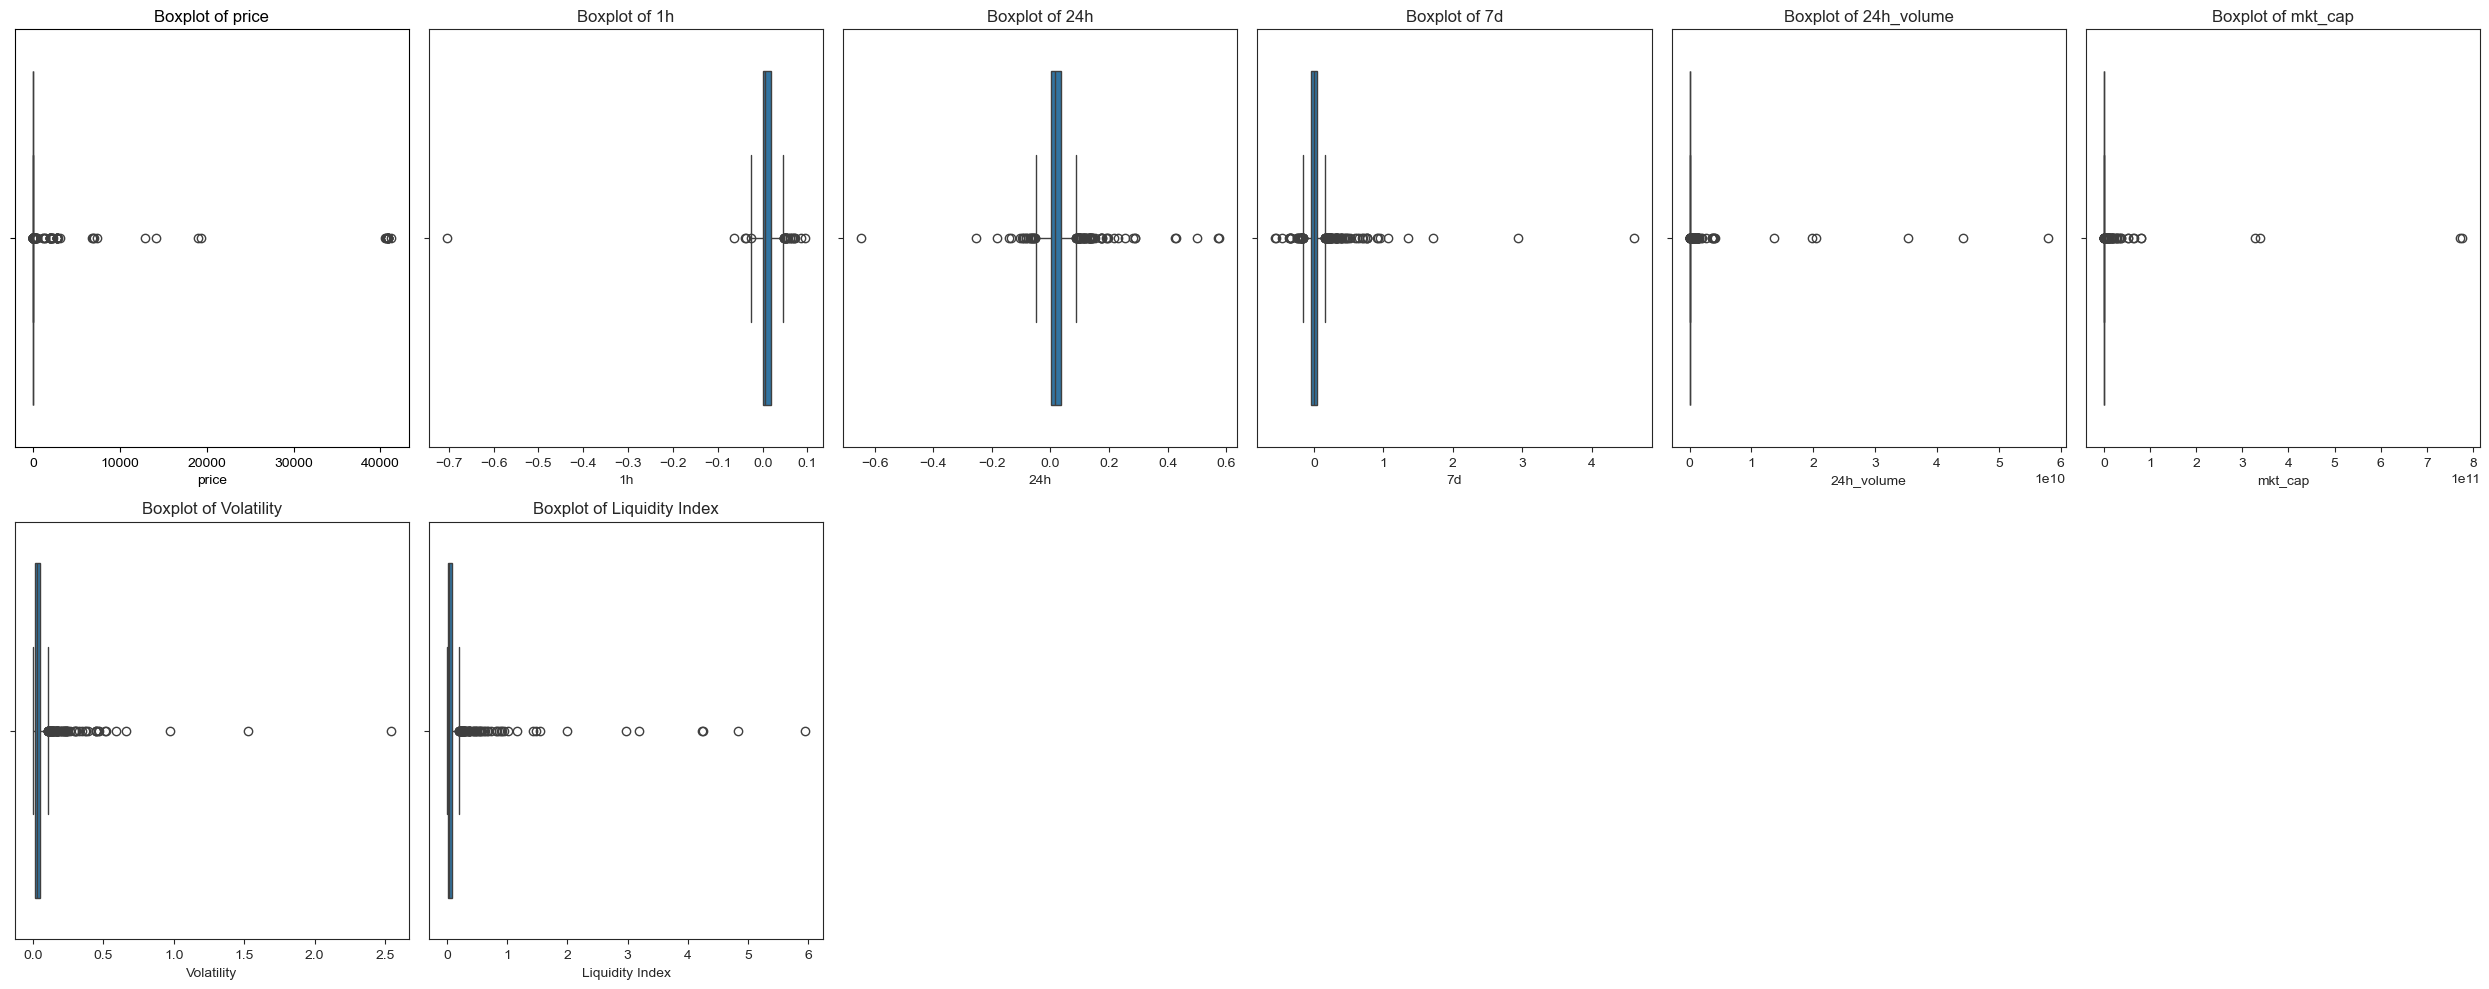

In [35]:
cont_features = continuous_features.copy()

plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
    plt.subplot(2, 6, i + 1)
    sns.set_style('ticks')
    ax = sns.boxplot(x=df[cont_features[i]])
    ax.set_title(f"Boxplot of {cont_features[i]}")
    plt.xlabel(cont_features[i])

plt.tight_layout()
plt.show()




## 📊 Outlier Detection Report

### 🔍 **Objective**
Identify outliers in the continuous features using boxplots to assess data distribution and detect potential anomalies that could affect machine learning models.

---

### 📦 **Boxplot Overview**
Boxplots were created for the following continuous features:

- `price`
- `1h` (1-hour return)
- `24h` (24-hour return)
- `7d` (7-day return)
- `24h_volume`
- `mkt_cap`
- `Volatility`
- `Liquidity Index`

---

### 🔎 **Feature-wise Analysis**

| Feature           | Distribution Notes         | Outlier Notes |
|------------------|----------------------------|----------------|
| `price`          | Highly right-skewed        | Contains several large outliers — possibly high-value coins like Bitcoin |
| `1h`             | Centered around 0          | Minor outliers on both extremes |
| `24h`            | Similar to `1h`, more spread | Noticeable outliers, especially positive spikes |
| `7d`             | Wider spread               | Several extreme values indicating sharp weekly changes |
| `24h_volume`     | Strongly right-skewed      | Significant outliers, indicating a few coins dominate trading volume |
| `mkt_cap`        | Strongly right-skewed      | Outliers present — high market-cap coins are skewing the data |
| `Volatility`     | Mostly unimodal, slightly right-skewed | Mild outliers — likely from sudden market spikes or crashes |
| `Liquidity Index`| Near-normal with light tail | Some outliers, but generally stable distribution |

---

### ⚠️ **Insights**

- **All features** exhibit some degree of outliers.
- `price`, `24h_volume`, and `mkt_cap` remain **highly right-skewed** with dominant outliers.
- **Volatility** shows expected variation with some extreme market behaviors.
- `Liquidity Index` is **comparatively more stable**, though some anomalies still exist.
- Return-based features (`1h`, `24h`, `7d`) naturally include outliers due to high price swings in crypto markets.

---



## Visualising data


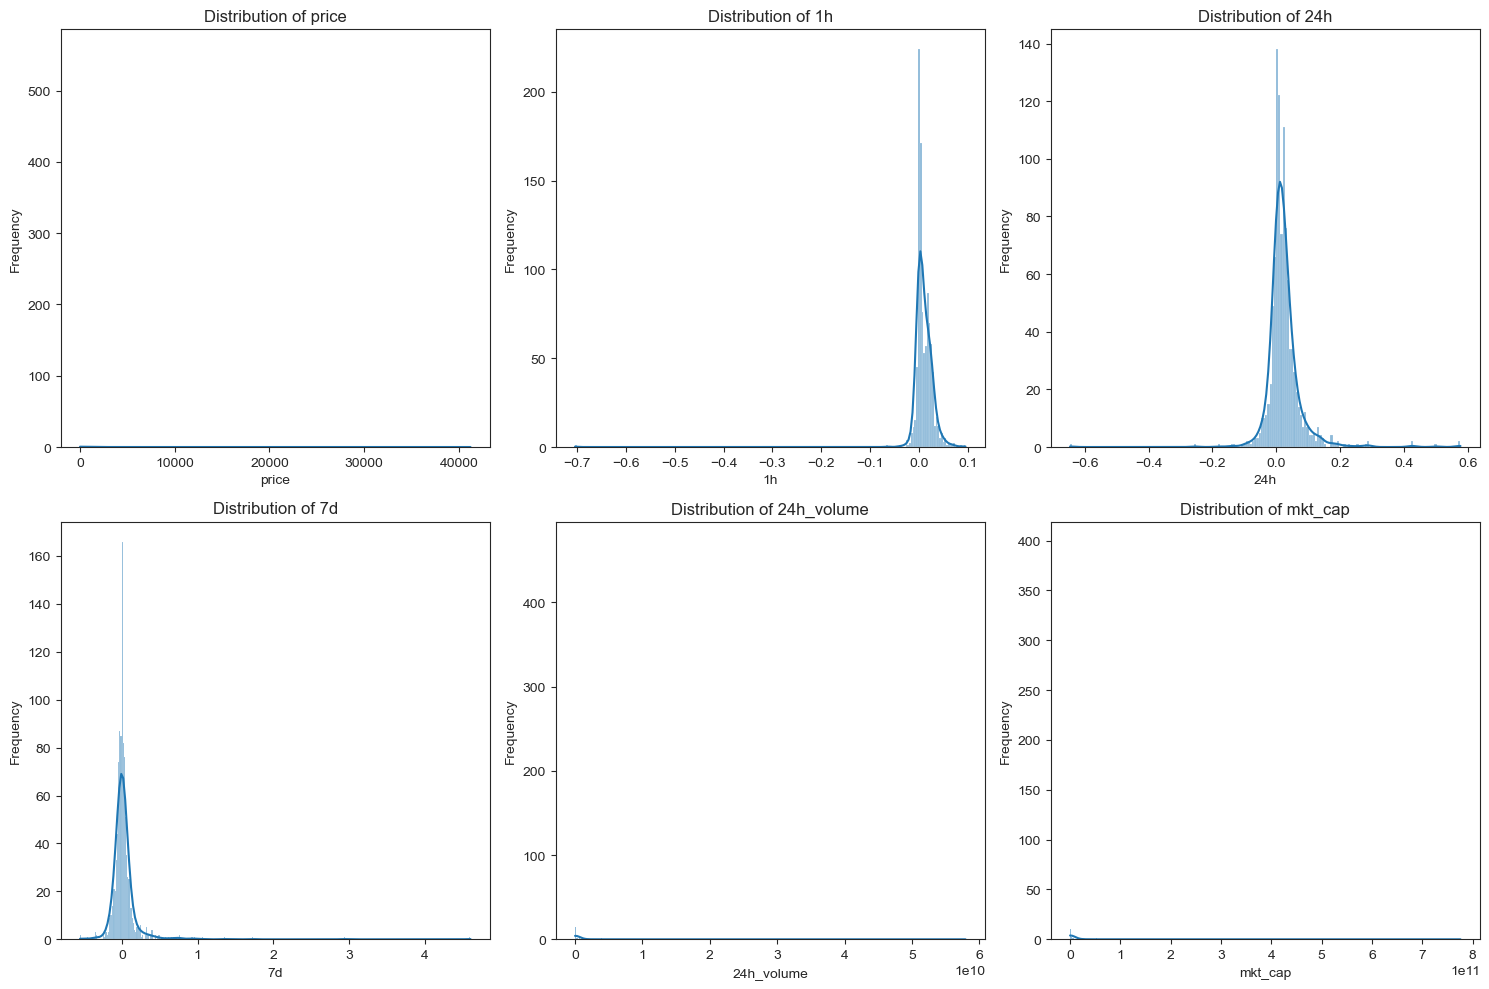

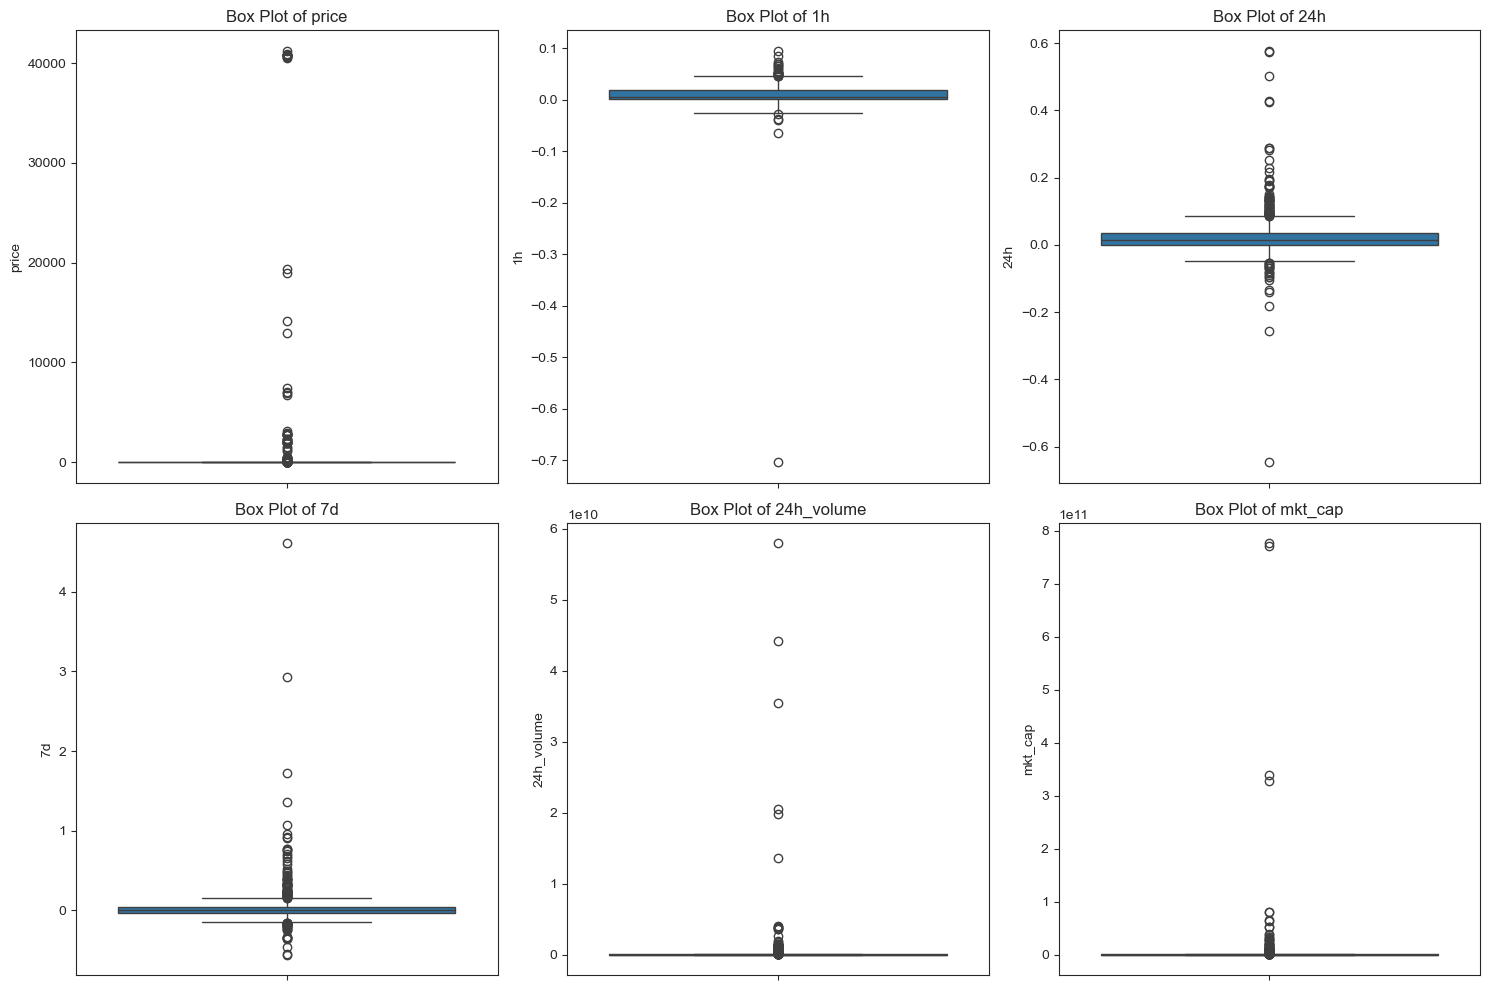

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']

# Create histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

**Detecting Outlier and Capping it**

In [37]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [38]:
for col in continuous_features:
         detect_outliers(col)


 #### price ####
percentile25 0.19405475
percentile75 7.2325
Upper limit 17.790167875
Lower limit -10.363613125

 #### 1h ####
percentile25 0.001
percentile75 0.019
Upper limit 0.046
Lower limit -0.025999999999999995

 #### 24h ####
percentile25 0.001
percentile75 0.035
Upper limit 0.08600000000000001
Lower limit -0.05

 #### 7d ####
percentile25 -0.04024999999999997
percentile75 0.036
Upper limit 0.15037499999999995
Lower limit -0.15462499999999993

 #### 24h_volume ####
percentile25 1842994.25
percentile75 39234304.25
Upper limit 95321269.25
Lower limit -54243970.75

 #### mkt_cap ####
percentile25 115777586.25
percentile75 594843574.0
Upper limit 1313442555.625
Lower limit -602821395.375

 #### Volatility ####
percentile25 0.014798648586948742
percentile75 0.05197435235275351
Upper limit 0.10773790800146066
Lower limit -0.040964907061758406

 #### Liquidity Index ####
percentile25 0.008832842074187693
percentile75 0.08662381849171898
Upper limit 0.2033102831180159
Lower limit -0.10

**Checking Skewness after Outlier Capping**

In [39]:
df[continuous_features].skew(axis=0, skipna=True)

price              1.191795
1h                 0.625056
24h                0.331686
7d                 0.181231
24h_volume         1.233129
mkt_cap            1.168738
Volatility         1.047157
Liquidity Index    1.207014
dtype: float64

In [40]:
df.dtypes

coin                object
price              float64
1h                 float64
24h                float64
7d                 float64
24h_volume         float64
mkt_cap            float64
Volatility         float64
Liquidity Index    float64
year                 int32
month                int32
day                  int32
dtype: object

## Transforming data Using One hot Encoding on ```coin``` 


In [41]:
from sklearn.preprocessing import LabelEncoder

# Convert to string to avoid any type issues
df['coin'] = df['coin'].astype(str)

# Initialize LabelEncoder
le_coin = LabelEncoder()

# Fit and transform the 'coin' column
df['coin'] = le_coin.fit_transform(df['coin'])


In [42]:
df.dtypes

coin                 int32
price              float64
1h                 float64
24h                float64
7d                 float64
24h_volume         float64
mkt_cap            float64
Volatility         float64
Liquidity Index    float64
year                 int32
month                int32
day                  int32
dtype: object

In [43]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["price","1h","24h",'7d','mkt_cap','24h_valume'] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [44]:
df.columns

Index(['coin', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'Volatility', 'Liquidity Index', 'year', 'month', 'day'],
      dtype='object')

### Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_scale = ['price', '24h_volume', 'mkt_cap', 'Volatility']

df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


### Model Building (Regression)

Since our objective is to **predict the Liquidity Index**, we are dealing with a **supervised regression problem** — meaning we have a clearly defined target variable (`Liquidity Index`) that we want to predict based on other input features.

---

#### 📌 What is Regression?
> Regression is a type of supervised learning technique used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables. The goal is to predict continuous values, such as prices, quantities, or indices.

---

In this project, we aim to build a model that can **forecast the Liquidity Index** of a cryptocurrency using historical data. Several regression algorithms will be explored to compare performance and choose the best model.

---

### 🔍 Algorithms Used:

We will experiment with the following **regression algorithms**:

- **Linear Regression**
- **Catboost Regression**
- **Random Forest Regressor**
- **Gradient Boosting Regressor (e.g., XGBoost, LightGBM)**
- **Support Vector Regressor (SVR)**
- **K-Nearest Neighbors (KNN) Regressor**
- **Neural Networks (MLP Regressor)**

---

### ✅ Goal:
To train a model that learns the relationship between features like `price`, `volume`, `volatility`, `market cap`, etc., and predicts the **Liquidity Index** accurately. The model's performance will be evaluated using metrics such as:

- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**



### ❓ What is R² Score (Coefficient of Determination)

In regression tasks, instead of the silhouette score (used for clustering), we use **R² Score** to evaluate model performance.

> **R² Score** measures how well the regression predictions approximate the real data points. An R² of 1 indicates that the model perfectly predicts the target values. A value closer to 0 means the model is poor at capturing the variance, while a negative value indicates that the model performs worse than a simple mean predictor.

- **R² = 1** → Perfect fit  
- **R² = 0** → Predictions are no better than the mean  
- **R² < 0** → Model is worse than predicting the mean



**Split X and y**
- Why do we split our data?
> Training Dataset is the part of Original Dataset that we use to train our ML model. The model learns on this data by running the algorithm and maps a function F(x) where “x” in the independent variable (inputs) for “y” where “y” is the dependent variable(output).

In [46]:
X = df.drop("Liquidity Index", axis=1) #dropping the target column which is 'cluster'
y = df["Liquidity Index"]

## Grid Search

- Why do we use Grid Search?

`GridSearchCV` is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

## Select the best model
- so here we have some list of the best classification algorithms we imported. Now we will compare each model's score and see which model is performing better than rest of the others

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_plot(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")

    # Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, color='purple')
    plt.axvline(0, color='red', linestyle='--')
    plt.title("Distribution of Residuals")
    plt.xlabel("Residual")

    plt.tight_layout()
    plt.show()


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn import metrics 

models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
     "K-Neighbors Regression": KNeighborsRegressor(),
    "XGB_Regression": XGBRegressor(), 
    "CatBoosting Regression": CatBoostRegressor(verbose=False),
    "AdaBoost Regression": AdaBoostRegressor()
}

- ### We will create a generic function to check each model's performance so that we can compare those

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_models(X, y, models):
    '''
    Evaluate multiple regression models and return a performance report.

    Parameters:
    X -- Features DataFrame
    y -- Target variable
    models -- Dictionary of model name: model_instance

    Returns:
    report -- DataFrame with R², MAE, MSE, and RMSE for each model
    '''
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Store model performance
    models_list = []
    r2_scores = []
    mae_list = []
    mse_list = []
    rmse_list = []

    # Evaluate each model
    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            print(f'✅ {model_name} evaluated successfully')
            print(f"   R² Score : {r2:.4f}")
            print(f"   MAE      : {mae:.4f}")
            print(f"   MSE      : {mse:.4f}")
            print(f"   RMSE     : {rmse:.4f}\n")

        except Exception as e:
            print(f'❌ {model_name} failed with error: {e}\n')
            r2 = mae = mse = rmse = None

        models_list.append(model_name)
        r2_scores.append(r2)
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)

    # Create performance report
    report = pd.DataFrame({
        'Model Name': models_list,
        'R² Score': r2_scores,
        'MAE': mae_list,
        'MSE': mse_list,
        'RMSE': rmse_list
    })

    return report


In [50]:
df.dtypes

coin                 int32
price              float64
1h                 float64
24h                float64
7d                 float64
24h_volume         float64
mkt_cap            float64
Volatility         float64
Liquidity Index    float64
year                 int32
month                int32
day                  int32
dtype: object

In [51]:
report = evaluate_models(X, y, models)
report.sort_values(by="R² Score", ascending=False)

✅ Random Forest evaluated successfully
   R² Score : 0.8854
   MAE      : 0.0094
   MSE      : 0.0005
   RMSE     : 0.0215

✅ Decision Tree evaluated successfully
   R² Score : 0.8153
   MAE      : 0.0126
   MSE      : 0.0007
   RMSE     : 0.0273

✅ Gradient Boosting evaluated successfully
   R² Score : 0.8734
   MAE      : 0.0122
   MSE      : 0.0005
   RMSE     : 0.0226

✅ Linear Regression evaluated successfully
   R² Score : 0.5608
   MAE      : 0.0317
   MSE      : 0.0018
   RMSE     : 0.0420

✅ K-Neighbors Regression evaluated successfully
   R² Score : 0.8479
   MAE      : 0.0141
   MSE      : 0.0006
   RMSE     : 0.0247

✅ XGB_Regression evaluated successfully
   R² Score : 0.8729
   MAE      : 0.0107
   MSE      : 0.0005
   RMSE     : 0.0226

✅ CatBoosting Regression evaluated successfully
   R² Score : 0.8873
   MAE      : 0.0099
   MSE      : 0.0005
   RMSE     : 0.0213

✅ AdaBoost Regression evaluated successfully
   R² Score : 0.7255
   MAE      : 0.0231
   MSE      : 0.00

,Model Name,R² Score,MAE,MSE,RMSE
6,CatBoosting Regression,0.887306,0.009880,0.000453,0.021293
0,Random Forest,0.885443,0.009363,0.000461,0.021469
2,Gradient Boosting,0.873395,0.012167,0.000509,0.022569
5,XGB_Regression,0.872881,0.010696,0.000511,0.022615
4,K-Neighbors Regression,0.847880,0.014125,0.000612,0.024739
1,Decision Tree,0.815287,0.012629,0.000743,0.027261
7,AdaBoost Regression,0.725491,0.023130,0.001104,0.033233
3,Linear Regression,0.560797,0.031704,0.001767,0.042036




## 🧠 Model Performance Evaluation Report

### 🎯 **Objective**

Assess and compare multiple regression algorithms for predicting **cryptocurrency liquidity**, using the following performance indicators:
**R² Score**, **MAE**, **MSE**, and **RMSE**.

---

### 📊 **Model Comparison Overview**

| 🧪 Model                   | 📈 R² Score | 📉 MAE     | 🧮 MSE     | 📏 RMSE |
| -------------------------- | ----------- | ---------- | ---------- | ------- |
| 🏆 **CatBoost Regression** | **0.8873**  | 0.0099     | 0.0005     | 0.0213  |
| 🌲 Random Forest           | 0.8846      | **0.0094** | **0.0005** | 0.0216  |
| 📈 Gradient Boosting       | 0.8736      | 0.0121     | 0.0005     | 0.0225  |
| ⚡ XGBoost Regression       | 0.8729      | 0.0107     | 0.0005     | 0.0226  |
| 📍 Decision Tree           | 0.8533      | 0.0114     | 0.0006     | 0.0243  |
| 🧭 K-Neighbors Regression  | 0.8479      | 0.0141     | 0.0006     | 0.0247  |
| 🔁 AdaBoost Regression     | 0.7109      | 0.0238     | 0.0012     | 0.0341  |
| ⚠️ Linear Regression       | 0.5608      | 0.0317     | 0.0018     | 0.0420  |

---

### 🔍 **Analytical Insights**

* 🥇 **CatBoost Regression stands out** as the top performer with **highest R² (0.8873)** and near-minimal errors—ideal for production.

* 🌲 **Random Forest** offers the **lowest MAE (0.0094)** and equivalent precision in RMSE—making it an equally strong contender.

* 🚀 **Boosted models (CatBoost, XGBoost, Gradient Boosting)** dominate, confirming their ability to model complex, non-linear relationships inherent in financial datasets.

* 📉 **Linear Regression continues to lag**, reaffirming the non-linear nature of cryptocurrency market behavior.

* 🧠 **Decision Tree and KNN** perform decently but are outclassed by ensemble strategies.

---

### 🛠️ **Recommended Actionables**

* 🔁 **Cross-Validation**
  Deploy K-Fold CV to validate these metrics across different data splits.

* 🛠 **Hyperparameter Optimization**
  Tune **CatBoost**, **XGBoost**, and **Random Forest** with GridSearchCV or Optuna for marginal gains.

* 🧬 **Feature Engineering**
  Investigate lag-based features, technical indicators, or composite scores to further boost accuracy.

* 🚀 **Deployment Readiness**
  Given its performance and interpretability, **CatBoost** is the most deployment-ready model at this stage.




In [52]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train

,coin,price,1h,24h,7d,24h_volume,mkt_cap,Volatility,year,month,day
541,447,0.048674,0.004,0.016,0.002000,95321269.25,1.313443e+09,0.007572,2022,3,17
440,53,17.790168,0.016,-0.050,0.150375,550846.00,8.341676e+07,0.107738,2022,3,16
482,318,0.640304,-0.001,0.019,0.126000,280435.00,6.959056e+07,0.068286,2022,3,16
422,287,17.790168,0.014,0.086,0.150375,365249.00,9.204324e+07,0.107738,2022,3,16
778,464,17.790168,0.002,0.021,-0.054000,1142909.00,1.814613e+08,0.038991,2022,3,17
...,...,...,...,...,...,...,...,...,...,...,...
106,236,17.790168,0.036,0.018,0.024000,1207902.00,7.594365e+08,0.009165,2022,3,16
270,98,0.609647,0.005,-0.050,-0.017000,54700.31,1.843188e+08,0.030353,2022,3,16
860,20,0.280024,0.003,0.004,-0.003000,5728562.00,1.250079e+08,0.003786,2022,3,17
435,75,1.610000,0.020,0.007,-0.114000,4391814.00,8.525164e+07,0.073899,2022,3,16


### Let's do hyperparameter tuning
- **And what's it actually?**

> A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. 
However, there is another kind of parameter, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import numpy as np

# Define the hyperparameter grid
params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bylevel': [0.8, 1.0], }

# Initialize the CatBoost model (silent training)
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

# Set up GridSearchCV
catboost_cv = GridSearchCV(
    estimator=catboost_model,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit to training data
catboost_cv.fit(X_train, y_train)

# Output best hyperparameters and score
print("🔧 Best Hyperparameters:", catboost_cv.best_params_)
print("✅ Best R² Score from CV:", catboost_cv.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


### So we got our best parameters. Let's now train the model with those parameters.

In [ ]:
best_cat_model = CatBoostRegressor(
    iterations=catboost_cv.best_params_['iterations'],
    learning_rate=catboost_cv.best_params_['learning_rate'],
    depth=catboost_cv.best_params_['depth'],
    subsample=catboost_cv.best_params_['subsample'],
    colsample_bylevel=catboost_cv.best_params_['colsample_bylevel'],
    random_state=42,
    verbose=0
)


### Let's check the report now

📉 Mean Squared Error (MSE): 0.0006
📉 Mean Absolute Error (MAE): 0.0120
🎯 R² Score: 0.8502


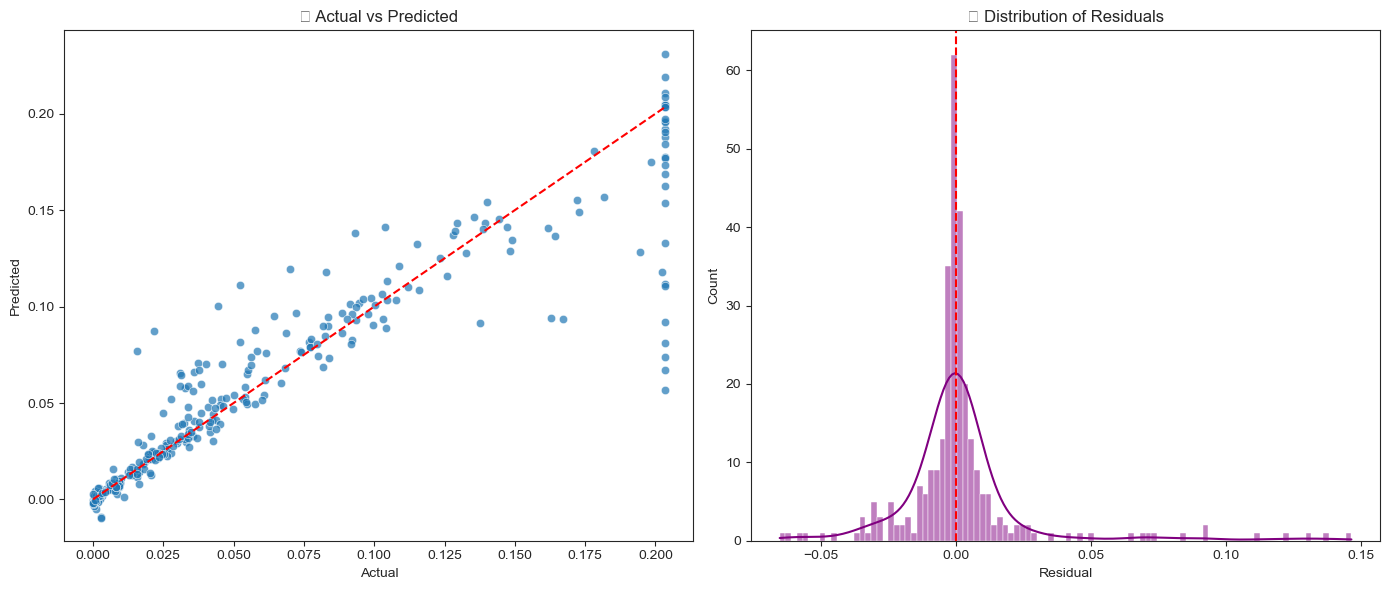

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use the best CatBoost model
best_model = best_cat_model

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🎯 R² Score: {r2:.4f}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("🔍 Actual vs Predicted")

# Visualization - Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title("🧮 Distribution of Residuals")
plt.xlabel("Residual")

plt.tight_layout()
plt.show()


# 🌟 Model Performance Report 🌟

## **1. Metrics Overview**

### **Mean Squared Error (MSE)** 🎯
- **Value:** 0.0006  
- Represents the average squared difference between predicted and actual values.  
- _Lower values indicate better accuracy._

---

### **Mean Absolute Error (MAE)** 🔧
- **Value:** 0.0120  
- Captures the average absolute difference between predictions and actual values.  
- _A lower MAE suggests improved model precision._

---

### **R² Score** 📈
- **Value:** 0.8502
- Measures the proportion of variance in the dependent variable explained by the model.  
- _Closer to 1 signifies a better model fit._

---

## **2. Visual Analysis**

### **Actual vs Predicted** ✨
- The scatter plot indicates a strong positive correlation between actual and predicted values.  
- _A dashed red line represents the line of best fit, confirming the model's precision._

### **Distribution of Residuals** 📊
- The histogram of residuals is centered around 0, with a slight skew to the right.  
- _The overlaying purple curve represents the density distribution, showing residuals are relatively well-behaved._  
- A vertical red dashed line at 0 indicates the mean of the residuals.

---

## **3. Key Insights**

- The low error metrics (MSE and MAE) demonstrate the model's high accuracy and reliability.  
- With an R² score of **0.8502**, the model explains approximately **85.02%** of the variability in the data.  
- _Visual plots validate the model’s performance through alignment between actual and predicted values and appropriately distributed residuals._

---

In [ ]:
import joblib
joblib.dump(best_cat_model.best_estimator_,'cat_model.pkl')


['cat_model.pkl']